### 3. Relationships in Data

#### Patterns over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
divorce_path = Path("G:/Data Science/EDA/EDA-DataCamp-2025/datasets/divorce.csv")
divorce = pd.read_csv(divorce_path)

In [3]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


In [4]:
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2205 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


In [5]:
divorce = divorce[["marriage_date", "marriage_duration"]]
divorce

,marriage_date,marriage_duration
0,2000-06-26,5.0
1,2001-09-02,7.0
2,2000-02-02,2.0
3,2006-05-13,2.0
4,2007-08-06,3.0
...,...,...
2204,2002-03-08,4.0
2205,2002-03-22,4.0
2206,2009-02-10,2.0
2207,2008-10-25,3.0


In [6]:
divorce.dtypes

marriage_date         object
marriage_duration    float64
dtype: object

In [7]:
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])

In [8]:
divorce.dtypes

marriage_date        datetime64[ns]
marriage_duration           float64
dtype: object

In [9]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce["marriage_month"] 

0        6
1        9
2        2
3        5
4        8
        ..
2204     3
2205     3
2206     2
2207    10
2208     8
Name: marriage_month, Length: 2209, dtype: int32

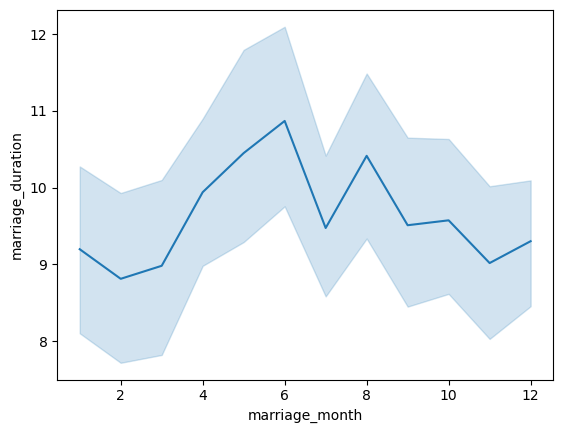

In [10]:
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()

#### Exercise - Patterns over time

##### Importing DateTime data

You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

<pre>
The column names and data types are as follows:

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
</pre>

It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.

In [11]:
# Import divorce.csv, saving as a DataFrame, divorce; indicate in the import function that the divorce_date, dob_man, dob_woman, and marriage_date columns should be imported as DateTime values.
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv("divorce.csv", parse_dates = ["divorce_date", "dob_man", "dob_woman", "marriage_date"])
print(divorce.dtypes)

FileNotFoundError: [Errno 2] No such file or directory: 'divorce.csv'

In [12]:
divorce_path = Path("G:/Data Science/EDA/EDA-DataCamp-2025/datasets/divorce.csv")
divorce = pd.read_csv(divorce_path)

##### Updating data type to DateTime

Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

In [13]:
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [14]:
# Convert the marriage_date column of the divorce DataFrame to DateTime values.
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce["marriage_date"].dtypes

dtype('<M8[ns]')

##### Visualizing relationships over time

Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

In [15]:
# Define a column called marriage_year, which contains just the year portion of the marriage_date column.
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year
divorce["marriage_year"]

0       2000
1       2001
2       2000
3       2006
4       2007
        ... 
2204    2002
2205    2002
2206    2009
2207    2008
2208    2009
Name: marriage_year, Length: 2209, dtype: int32

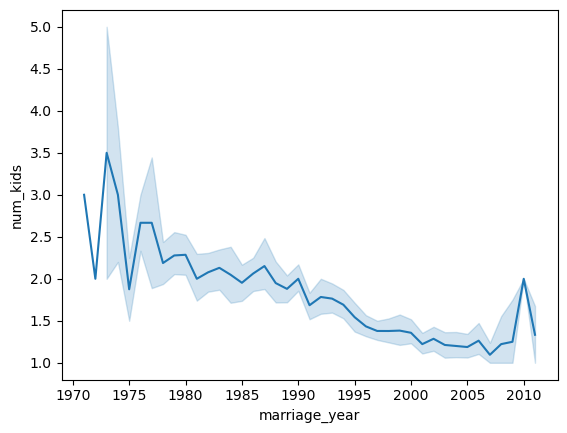

In [16]:
# Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.
sns.lineplot(data=divorce, x="marriage_year", y="num_kids")
plt.show()

#### Correlation

In [17]:
divorce.corr(numeric_only=True)

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


<Axes: >

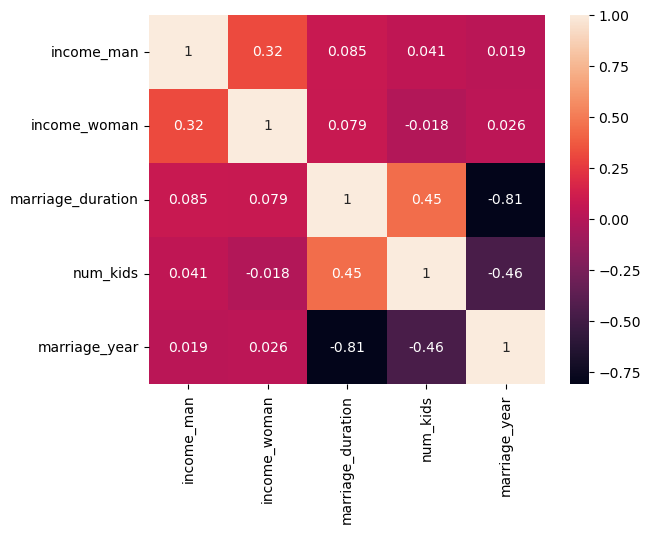

In [18]:
sns.heatmap(divorce.corr(numeric_only=True), annot=True)

In [19]:
divorce["divorce_date"].min()

'2000-01-08'

In [20]:
divorce["divorce_date"].max()

'2015-11-03'

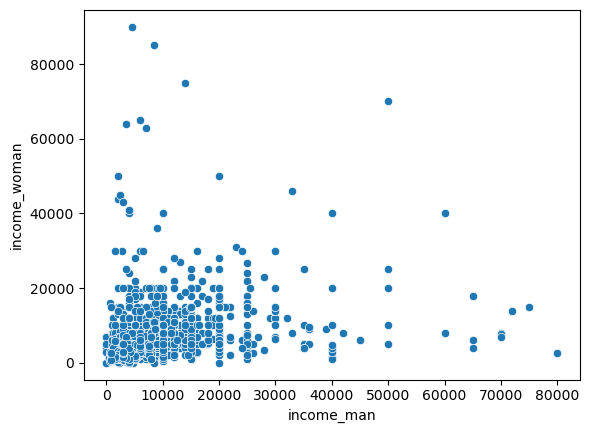

In [21]:
sns.scatterplot(data=divorce, x="income_man", y="income_woman")
plt.show()

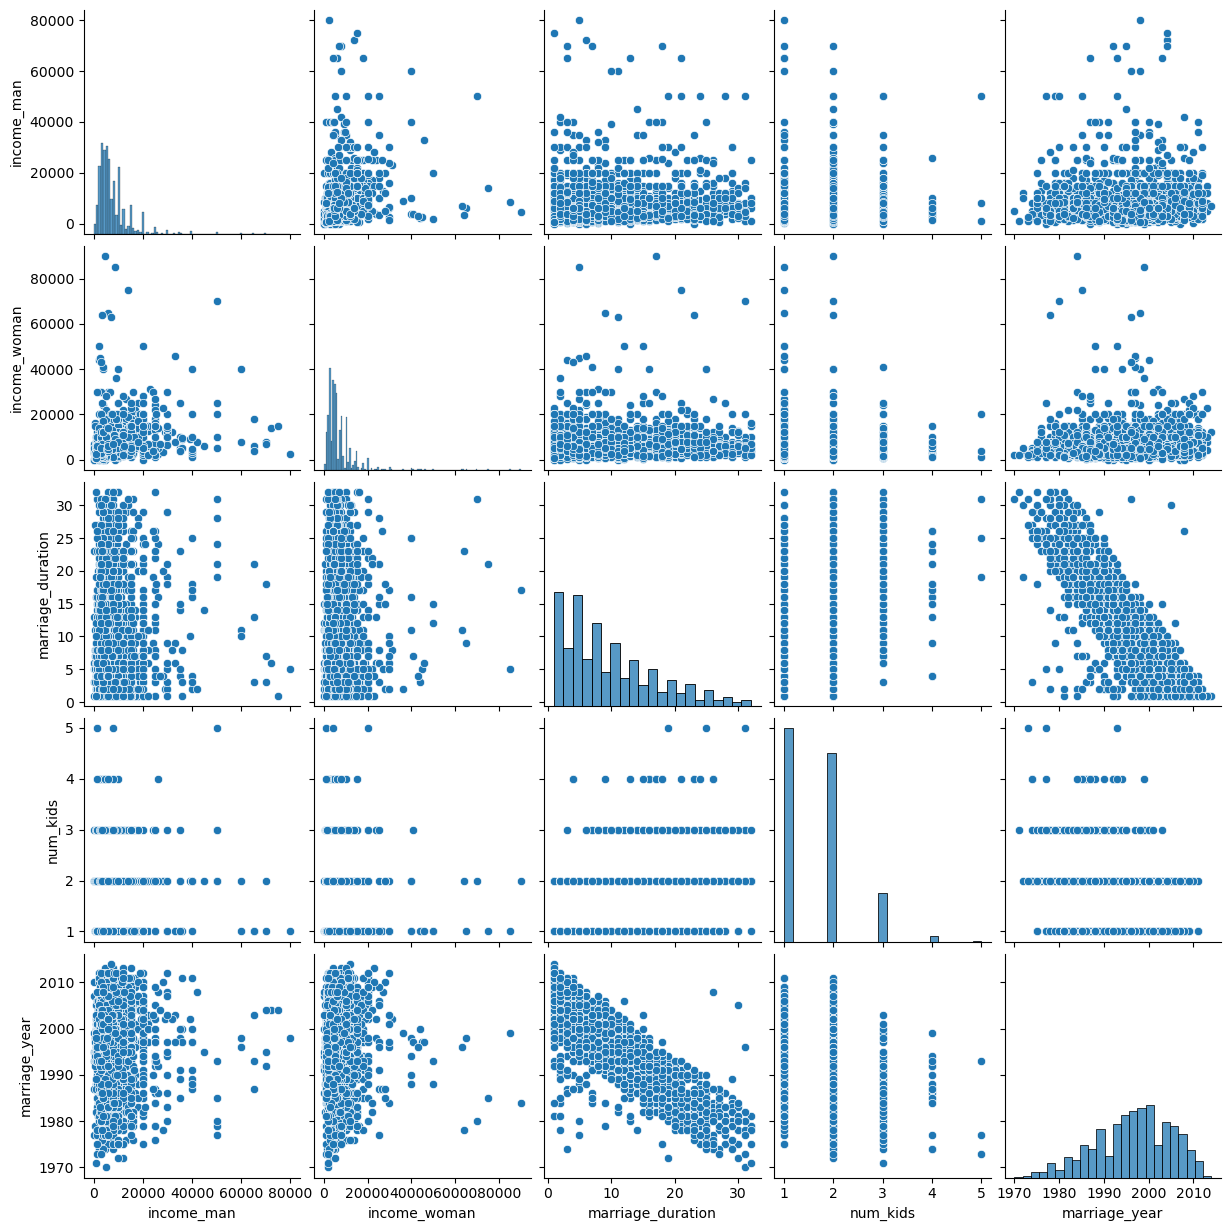

In [22]:
sns.pairplot(data=divorce)
plt.show()

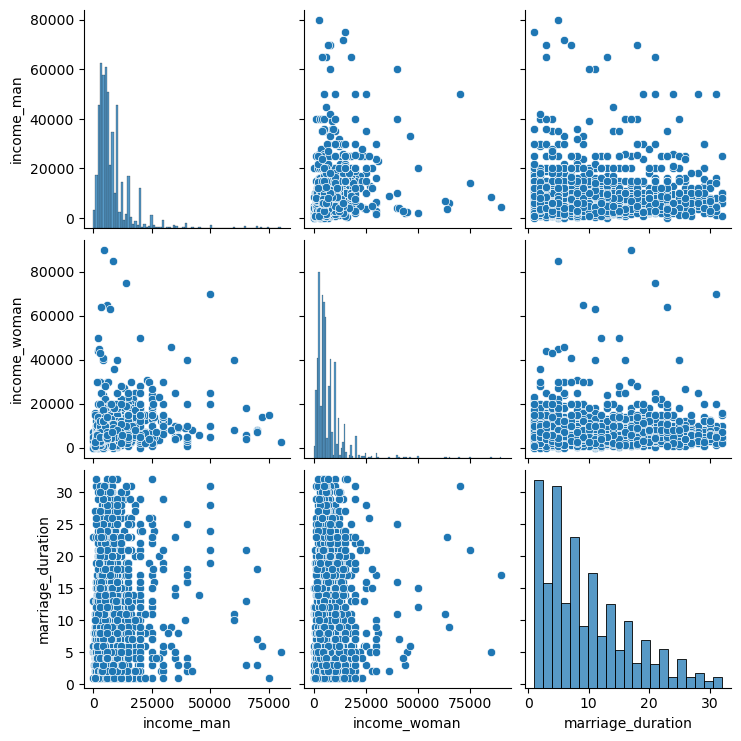

In [23]:
sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()

#### Exercise - Visualizing relationships over time

##### Interpreting a heatmap

<Axes: >

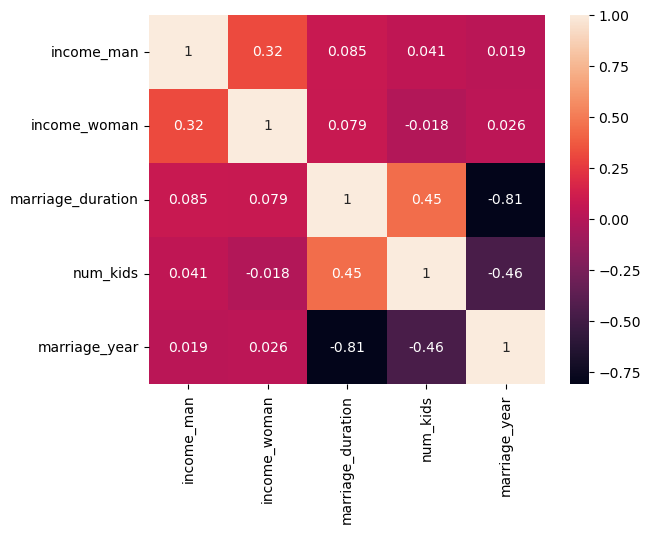

In [24]:
# Which of the below statements is correct regarding the relationships between variables in the divorce DataFrame?
sns.heatmap(divorce.corr(numeric_only=True), annot=True)

<pre style="font-size:12px">
    income_man  income_woman  marriage_duration   num_kids  marriage_year  marriage_month
income_man              1.000         0.318              0.085  4.085e-02          0.019       1.365e-02
income_woman            0.318         1.000              0.079 -1.801e-02          0.026       4.144e-02
marriage_duration       0.085         0.079              1.000  4.474e-01         -0.812       1.433e-03
num_kids                0.041        -0.018              0.447  1.000e+00         -0.461      -5.510e-04
marriage_year           0.019         0.026             -0.812 -4.615e-01          1.000      -1.146e-02
marriage_month          0.014         0.041              0.001 -5.510e-04         -0.011       1.000e+00
</pre>

##### Visualizing variable relationships

In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

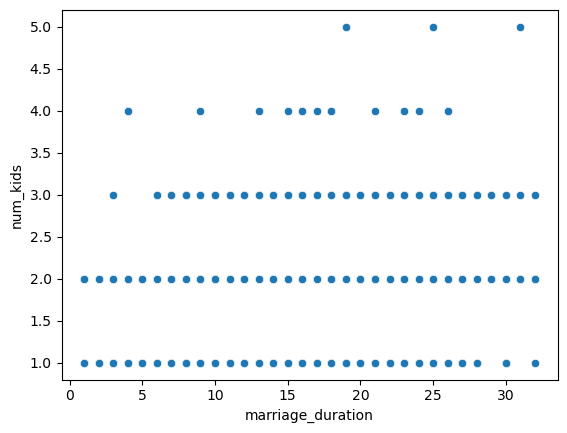

In [27]:
# Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.
sns.scatterplot(data=divorce, x="marriage_duration", y="num_kids")
plt.show()

##### Visualizing multiple variable relationships

Seaborn's .pairplot() is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

Your task is to use a pairplot to compare the relationship between marriage_duration and income_woman. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

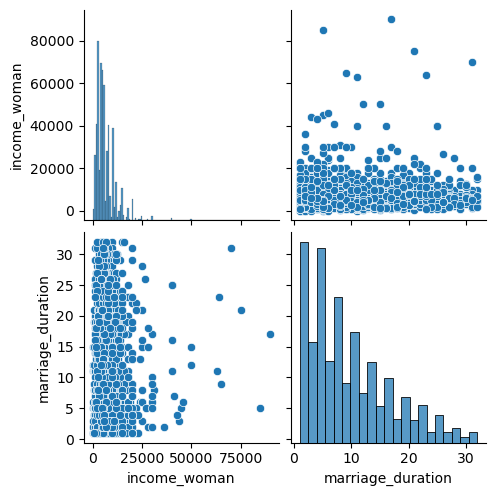

In [28]:
# Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame.
sns.pairplot(data=divorce, vars=["income_woman", "marriage_duration"])
plt.show()

#### Factor relationships and distributions

In [29]:
# level of eucation: male partner
divorce["education_man"].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64

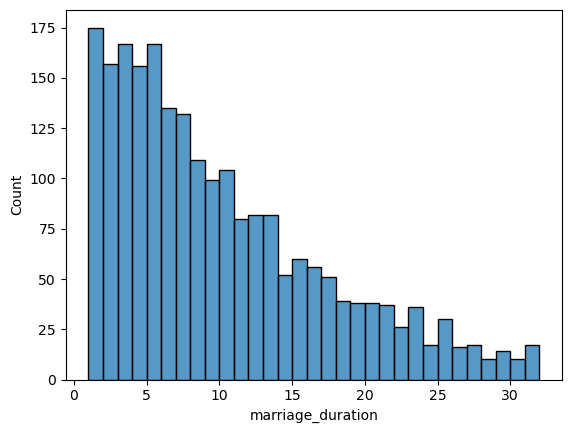

In [30]:
sns.histplot(data=divorce, x="marriage_duration", binwidth=1)
plt.show()

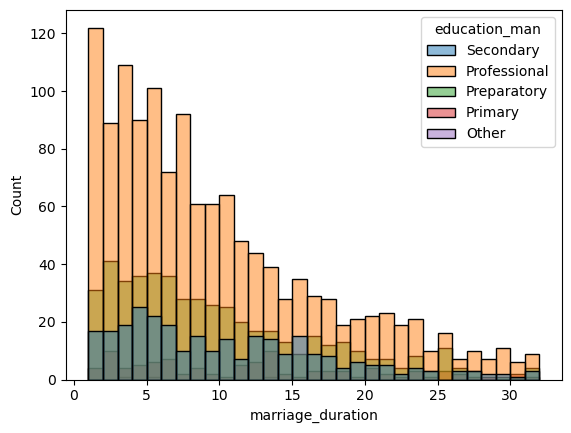

In [33]:
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()

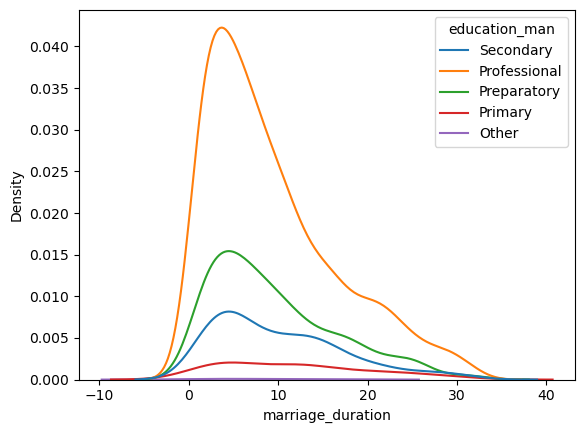

In [34]:
# KDE
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()

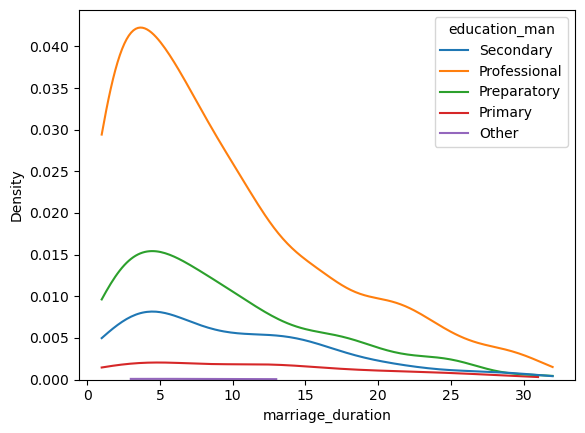

In [35]:
# KDE
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()

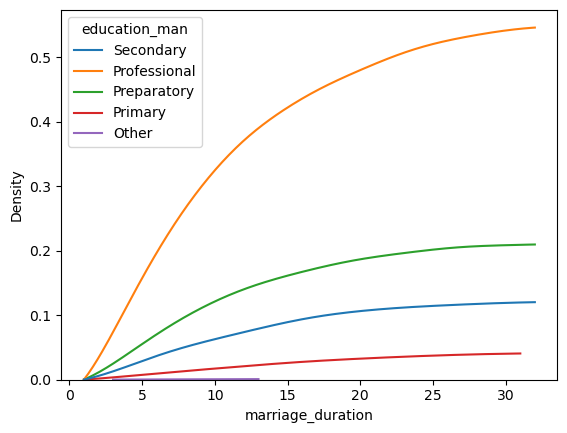

In [36]:
# Cumalative KDE
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)
plt.show()

In [48]:
# Relationship between marriage age and education
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [49]:
# Create the scatter plot
sns.scatterplot(data=divorce, x="woman_age_marriage", y="income_woman", hue="education_woman")
plt.show()

ValueError: Could not interpret value `woman_age_marriage` for `x`. An entry with this name does not appear in `data`.